# Comparação Estatisitica dos modelos

- carreguei os resultados dos modelos treinados no colab anterior (df_resultados) contendo:
  - Modelos testados
  - Subconjuntos de features
  - Acuracia e F1

- agrupamento dos resultados por modelo, ignorando variações de subconjuntos, usando medias como desempenho geral

- visualização comparativa

- aplicação de teste estatistico formal
  - Friedman:verificar se existe diferença significativa entre os modelos
    - resultado: diferença confirmada (p <= 0.05)
  - Nemenyi para comparaçoes multiplas
    - identificaçao das comparações com diferença

- Interpretação dos resultados
  - nenhum modelo foi significativamente melhor que todos os outros
  - Regressão Logistica teve desempenho significativamente inferior em comparação a outros modelos (DT)

- seleção final dos modelos
  - criterios: performance, análise estatistica e interpretabilidade
  - MLP (melhor performance)
  - Random Forest (pouca diferença, melhor interpretabilidade)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import friedmanchisquare

!pip install scikit-posthocs --quiet
import scikit_posthocs as sp

!pip install scikit-posthocs --quiet

import numpy as np


## carregamento do df_resultados

In [ ]:
BASE_URL = "https://raw.githubusercontent.com/AnaClaraGuerra22/INF-493-CD/4fc21c3e54b3aaddcd4f584e0460e097f4999fa9/TRAB%20FINAL/DATASET/DATASET%20MODELOS"

RESULTS_URL = f"{BASE_URL}/df_resultados.csv"
df_resultados = pd.read_csv(RESULTS_URL)

print(df_resultados.shape[0])
display(df_resultados.head())


49


,Subconjunto,Modelo,Acurácia,F1 Score (macro),Subconjunto_Abreviado
0,Mutual Info (Top 10),MLP,0.909091,0.909137,MI (10)
1,Mutual Info (Top 5),Regressão Logística,0.904545,0.905831,MI (5)
2,RFE (Top 5),Regressão Logística,0.904545,0.904857,RFE (5)
3,RFE (Top 10),Regressão Logística,0.904545,0.904857,RFE (10)
4,Mutual Info (Top 10),Regressão Logística,0.900000,0.901390,MI (10)


## organizar os dados

In [ ]:
df_pivot = df_resultados.pivot_table(
    index=['Modelo', 'Subconjunto'],
    values=['Acurácia', 'F1 Score (macro)'],
    aggfunc='mean'
)

df_pivot = df_pivot.sort_values(by="Acurácia", ascending=False)
display(df_pivot)


Acurácia  F1 Score (macro)
Modelo              Subconjunto                                       
MLP                 Mutual Info (Top 10)    0.909091          0.909137
Regressão Logística Mutual Info (Top 5)     0.904545          0.905831
                    RFE (Top 10)            0.904545          0.904857
                    RFE (Top 5)             0.904545          0.904857
                    Mutual Info (Top 10)    0.900000          0.901390
Random Forest       RFE (Top 5)             0.895455          0.895544
                    RFE (Top 10)            0.895455          0.895544
KNN                 Mutual Info (Top 10)    0.890909          0.890668
MLP                 RFE (Top 5)             0.890909          0.891013
                    RFE (Top 10)            0.890909          0.891013
SVM                 Mutual Info (Top 10)    0.890909          0.892004
Regressão Logística Random Forest (Top 5)   0.890909          0.892300
Gradient Boosting   Mutual Info (Top 10)    0.890909          0.890877
SVM                 RFE (Top 10)            0.886364          0.886258
                    RFE (Top 5)             0.886364          0.886258
Random Forest       Random Forest (Top 10)  0.886364          0.886649
                    Todas as Features       0.886364          0.886032
Regressão Logística Todas as Features       0.881818          0.882047
Gradient Boosting   Mutual Info (Top 5)     0.881818          0.881550
Decision Tree       RFE (Top 5)             0.881818          0.881831
KNN                 Random Forest (Top 10)  0.881818          0.882249
Decision Tree       RFE (Top 10)            0.881818          0.881831
KNN                 RFE (Top 5)             0.877273          0.876700
SVM                 Random Forest (Top 5)   0.877273          0.877520
Regressão Logística Random Forest (Top 10)  0.877273          0.877795
Gradient Boosting   Random Forest (Top 5)   0.877273          0.876968
                    RFE (Top 10)            0.877273          0.877209
                    RFE (Top 5)             0.877273          0.877209
KNN                 RFE (Top 10)            0.877273          0.876700
MLP                 Random Forest (Top 10)  0.877273          0.877771
                    Mutual Info (Top 5)     0.877273          0.877216
Random Forest       Mutual Info (Top 10)    0.877273          0.877350
MLP                 Random Forest (Top 5)   0.877273          0.877076
SVM                 Mutual Info (Top 5)     0.872727          0.873432
MLP                 Todas as Features       0.872727          0.872856
Gradient Boosting   Random Forest (Top 10)  0.872727          0.872674
KNN                 Mutual Info (Top 5)     0.872727          0.872073
Decision Tree       Random Forest (Top 10)  0.872727          0.873098
                    Mutual Info (Top 5)     0.872727          0.872574
                    Todas as Features       0.868182          0.868224
                    Random Forest (Top 5)   0.868182          0.867879
SVM                 Random Forest (Top 10)  0.868182          0.868624
Random Forest       Random Forest (Top 5)   0.868182          0.867604
KNN                 Random Forest (Top 5)   0.863636          0.864951
Gradient Boosting   Todas as Features       0.863636          0.863573
Random Forest       Mutual Info (Top 5)     0.863636          0.863268
Decision Tree       Mutual Info (Top 10)    0.854545          0.854093
KNN                 Todas as Features       0.431818          0.426369
SVM                 Todas as Features       0.354545          0.276441

## visualizar ranking por media

Top 10 modelos:


,Subconjunto,Modelo,Acurácia,F1 Score (macro),Subconjunto_Abreviado
0,Mutual Info (Top 10),MLP,0.909091,0.909137,MI (10)
1,Mutual Info (Top 5),Regressão Logística,0.904545,0.905831,MI (5)
2,RFE (Top 5),Regressão Logística,0.904545,0.904857,RFE (5)
3,RFE (Top 10),Regressão Logística,0.904545,0.904857,RFE (10)
4,Mutual Info (Top 10),Regressão Logística,0.900000,0.901390,MI (10)
5,RFE (Top 5),Random Forest,0.895455,0.895544,RFE (5)
6,RFE (Top 10),Random Forest,0.895455,0.895544,RFE (10)
12,Random Forest (Top 5),Regressão Logística,0.890909,0.892300,RF (5)
7,Mutual Info (Top 10),SVM,0.890909,0.892004,MI (10)
11,RFE (Top 10),MLP,0.890909,0.891013,RFE (10)


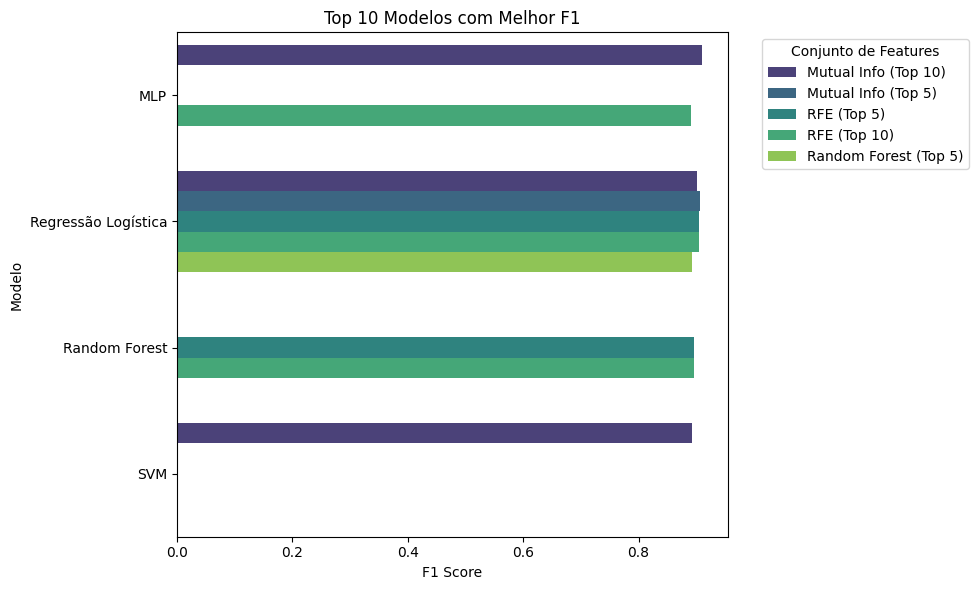

In [ ]:
df_ranked = df_resultados.sort_values(by="F1 Score (macro)", ascending=False)

top10 = df_ranked.head(10)

print("Top 10 modelos:")
display(top10)

plt.figure(figsize=(10, 6))

sns.barplot(
    data=top10,
    x="F1 Score (macro)",
    y="Modelo",
    hue="Subconjunto",
    palette="viridis"
)

plt.title("Top 10 Modelos com Melhor F1")
plt.xlabel("F1 Score")
plt.ylabel("Modelo")
plt.legend(title="Conjunto de Features", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


## preparar dados no formato para teste estatistico

- teste Friedman
  - uma matriz com
    - linhas = comparações emparelhadas (subconjuntos usados)
    - colunas = modelos

In [ ]:
matriz_friedman = df_resultados.pivot_table(
    index='Subconjunto',
    columns='Modelo',
    values='Acurácia'
)

display(matriz_friedman)


Modelo,Decision Tree,Gradient Boosting,KNN,MLP,Random Forest,Regressão Logística,SVM
Subconjunto,,,,,,,
Mutual Info (Top 10),0.854545,0.890909,0.890909,0.909091,0.877273,0.900000,0.890909
Mutual Info (Top 5),0.872727,0.881818,0.872727,0.877273,0.863636,0.904545,0.872727
RFE (Top 10),0.881818,0.877273,0.877273,0.890909,0.895455,0.904545,0.886364
RFE (Top 5),0.881818,0.877273,0.877273,0.890909,0.895455,0.904545,0.886364
Random Forest (Top 10),0.872727,0.872727,0.881818,0.877273,0.886364,0.877273,0.868182
Random Forest (Top 5),0.868182,0.877273,0.863636,0.877273,0.868182,0.890909,0.877273
Todas as Features,0.868182,0.863636,0.431818,0.872727,0.886364,0.881818,0.354545


# Teste de Friedman

- H0: todos os modelos com mesmo desempenho
- se p <= 0.05: existe diferença significativa

In [ ]:
stat, p = friedmanchisquare(*[matriz_friedman[col] for col in matriz_friedman.columns])
print(f"Friedman Test \nx-squad = {stat:.4f} \np-value = {p:.6f}")


Friedman Test 
x-squad = 18.4000 
p-value = 0.005307


p-value deu 0.005307

Logo, tem diferença significativa no desempenho dos classificadores
entao tem que fazer o Post-hoc Nemenyi

## teste de Post-hoc Nemenyi

- criar versao “wide format” dpara o teste post-hoc
  - reorganiza para que cada coluna seja um modelo e cada linha um subconjunto de features testado

In [ ]:
df_temp = df_resultados.copy()

df_wide = df_temp.pivot_table(
    index="Subconjunto",
    columns="Modelo",
    values="Acurácia"
)

print(df_wide)


Modelo                  Decision Tree  Gradient Boosting       KNN       MLP  \
Subconjunto                                                                    
Mutual Info (Top 10)         0.854545           0.890909  0.890909  0.909091   
Mutual Info (Top 5)          0.872727           0.881818  0.872727  0.877273   
RFE (Top 10)                 0.881818           0.877273  0.877273  0.890909   
RFE (Top 5)                  0.881818           0.877273  0.877273  0.890909   
Random Forest (Top 10)       0.872727           0.872727  0.881818  0.877273   
Random Forest (Top 5)        0.868182           0.877273  0.863636  0.877273   
Todas as Features            0.868182           0.863636  0.431818  0.872727   

Modelo                  Random Forest  Regressão Logística       SVM  
Subconjunto                                                           
Mutual Info (Top 10)         0.877273             0.900000  0.890909  
Mutual Info (Top 5)          0.863636             0.904545  0.8727

## Teste de Nemenyi corretamente

O scikit-posthocs funciona com matriz NxM, onde linhas = tratamentos (subconjuntos) e colunas = modelos

- interpretabilidade:
  - p > 0.05: diferenças NÃO significativas
  - p <= 0.05: diferença estatisticamente significativa (um modelo é melhor na media)

In [ ]:
nemenyi_df = sp.posthoc_nemenyi_friedman(df_wide)
nemenyi_df


,Decision Tree,Gradient Boosting,KNN,MLP,Random Forest,Regressão Logística,SVM
Decision Tree,1.000000,0.997914,1.000000,0.314698,0.716494,0.026853,0.999796
Gradient Boosting,0.997914,1.000000,0.997914,0.676979,0.956377,0.126427,0.999997
KNN,1.000000,0.997914,1.000000,0.314698,0.716494,0.026853,0.999796
MLP,0.314698,0.676979,0.314698,1.000000,0.996250,0.956377,0.552164
Random Forest,0.716494,0.956377,0.716494,0.996250,1.000000,0.676979,0.903577
Regressão Logística,0.026853,0.126427,0.026853,0.956377,0.676979,1.000000,0.078926
SVM,0.999796,0.999997,0.999796,0.552164,0.903577,0.078926,1.000000


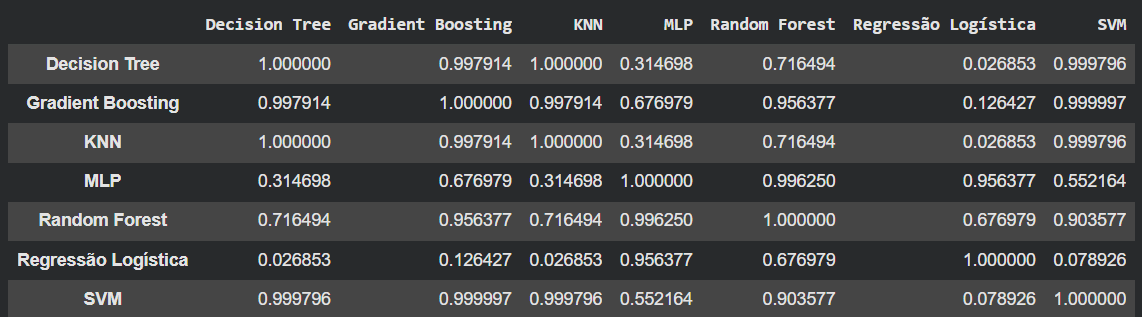

### interpretando
- Decision Tree vs
  - GB: NAO SIGNIFICATIVO
  - KNN: NAO SIGNIFICATIVO
  - MLP: SIGNIFICATIVO
  - RF: NAO SIGNIFICATIVO
  - RL: SIGNIFICATIVO
  - SVM: NAO SIGNIFICATIVO

- Gradient Boosting vs
  - KNN: NAO SIGNIFICATIVO
  - MLP: NAO SIGNIFICATIVO
  - RF: NAO SIGNIFICATIVO
  - RL: SIGNIFICATIVO
  - SVM: NAO SIGNIFICATIVO

- KNN vs
  - MLP: SIGNIFICATIVO
  - RF: NAO SIGNIFICATIVO
  - RL: SIGNIFICATIVO
  - SVM: NAO SIGNIFICATIVO

- MLP vs
  - RF: NAO SIGNIFICATIVO
  - RL: NAO SIGNIFICATIVO
  - SVM: NAO SIGNIFICATIVO

- RF vs
  - RL: NAO SIGNIFICATIVO
  - SVM: NAO SIGNIFICATIVO

- RL vs
  - SVM: NAO SIGNIFICATIVO

## visualizando

Decision Tree vs Regressão Logística: p = 0.0269
KNN vs Regressão Logística: p = 0.0269


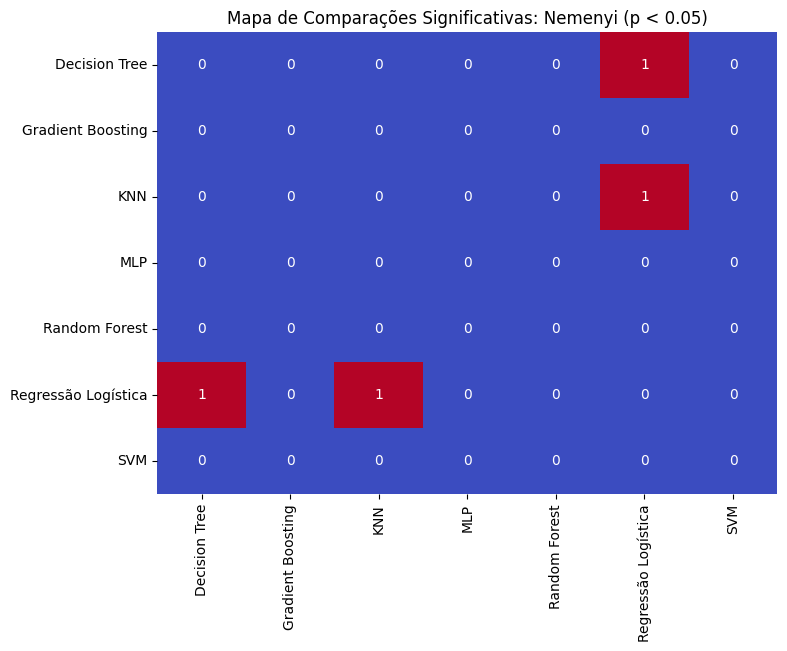

In [ ]:
significativas = (nemenyi_df < 0.05) & (nemenyi_df != 1.0)
pares_significativos = []

modelos = nemenyi_df.columns.tolist()

for i in range(len(modelos)):
    for j in range(i + 1, len(modelos)):
        if significativas.iloc[i, j]:
            pares_significativos.append((modelos[i], modelos[j], nemenyi_df.iloc[i, j]))

if pares_significativos:
    for m1, m2, p in pares_significativos:
        print(f"{m1} vs {m2}: p = {p:.4f}")


plt.figure(figsize=(8, 6))
sns.heatmap(
    significativas,
    annot=True,
    cmap="coolwarm",
    cbar=False,
    xticklabels=modelos,
    yticklabels=modelos
)
plt.title("Mapa de Comparações Significativas: Nemenyi (p < 0.05)")
plt.show()

### interpretando
- vermelho:A diferença entre os modelos é significativa
- Azul/Frio: não tem diferença significativa

- diferenças
  - Decision Tree vs Regressão Logística: p = 0.0269
  - KNN vs Regressão Logística: p = 0.0269

- Conclusões
  - Regressão Logística é significativamente pior que alguns modelos (DT e KNN)- demais modelos NÃO apresentam diferenças significativas entre si

- Isso significa que, estatisticamente, esses modelos tem um desempenho equivalente (considerando p = 0.05)
  - Random Forest
  - MLP
  - GB
  - SVM
  - DT
  - KNN

## entao como escolher o melhor modelo? Usar criterios de
- melhor desempenho medio (acurácia, F1 macro)
- interpretabilidade
- custo computaciona
- explicabilidade (LIME/SHAP)

# CONCLUSAO FINAL

O teste de Friedman indicou diferença estatística global no desempenho dos modelos (X squad = 18.40, p = 0.0053). O teste pós-hoc de Nemenyi revelou diferenças significativas apenas nos pares DT vs Regressão Logistica (p = 0.0269) e KNN vs RL (p = 0.0269). Para os demais modelos, não foram observadas diferenças estatisticas significativas, indicando desempenho equivalente com confiança de 95%. Considerando os resultados estatisticos e metricas de desempenho, vou seguir a análise aprofundada com os modelos que apresentaram o melhor desempenho medio e melhor interpretabilidade.

## seleçao do melhor modelo

In [ ]:
df_sorted = df_resultados.sort_values(
    by=["Acurácia", "F1 Score (macro)"], ascending=False).reset_index(drop=True)


best_model = df_sorted.loc[0]

print("Melhor modelo selecionado:")
print(best_model)


print("\nModelo escolhido para análise final:")
print(f"Modelo: {best_model['Modelo']}")
print(f"Subconjunto de Features: {best_model['Subconjunto']}")
print(f"Acurácia: {best_model['Acurácia']:.4f}")
print(f"F1-macro: {best_model['F1 Score (macro)']:.4f}")

Melhor modelo selecionado:
Subconjunto              Mutual Info (Top 10)
Modelo                                    MLP
Acurácia                             0.909091
F1 Score (macro)                     0.909137
Subconjunto_Abreviado                 MI (10)
Name: 0, dtype: object

Modelo escolhido para análise final:
Modelo: MLP
Subconjunto de Features: Mutual Info (Top 10)
Acurácia: 0.9091
F1-macro: 0.9091


### O modelo MLP apresentou o melhor desempenho, porem é um modelo caixa-preta
### Assim, para as proximas etapas, irei usar o MLP e o RF
Para ele ser compreensivel, sera necessário a aplicação de tecnicas de interpretabilidade pós-hoc, como SHAP e LIME.
Já a Regressão Logistica e Random Forest apresentam maior interpretabilidade, embora com desempenho ligeiramente menor.

## salvar os modelos para usar no proximo colab